# Lab Two - Exploring Data

You are to perform preprocessing and exploratory analysis of a data set: exploring the statistical summaries of the features, visualizing the attributes, and addressing data quality. This report is worth 10% of the final grade. Please upload a report (<b>one per team</b>) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output.

<b>Dataset requirements</b>: Choose a dataset that is comprised of image data. The data should be directories of images. That is, the dataset should not yet be pre-processed. The following are required for the dataset:

<ol>
    <li>The data includes at least 1000 images</li>
    <li>The size of the images should be larger than 20x20 pixels</li>
    <li>The dataset should have a well defined prediction task (i.e., a label for each image)</li>
    <li>The dataset cannot be MNIST or Fashion MNIST</li>
</ol>

<i><b>A note on grading</b>: This lab is mostly about visualizing and understanding your dataset. The largest share of the points is from how you interpret the visuals that you make. Making the visuals is not enough to satisfy each of the rubrics below—you should appropriately explain what the implications of the visualizations are. In other words, expect about 20% of the available points for visuals that have no substantive discussion.</i>

## Business Understanding (2pts)

<ul>
    <li><b>[2 points]</b> Give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). What is the prediction task for your dataset and which third parties would be interested in the results? Why is this data important? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to the identified third parties? Be specific and use your own words to describe the aspects of the data.</li>
</ul>

For this lab, we utilized a dataset of 5286 Chest X-Ray images in the context of identifying Normal lung condition or Pnemonia as a result of COVID-19, Streptococcus, or ARDS (Acute Respiratory Distress Syndrome). This dataset was most likely created in a medical setting, as every image is an X-Ray and, to my knowledge, most X-Ray machines are utilized in a hospital or doctor's office setting.

The dataset may be utilized to more efficiently diagnose whether or not a patient has pnemonia. This would be helpful for diagnosing patients with pnemonia post COVID-19, streptococcus, or ARDS. On the other hand, it would also be helpful for detecting a symptom of COVID-19, streptococcus, or ARDS. In other words, if a patient has a previous diagnosis, it would be helpful to see what effects the diagnosis is having on the lungs on the patient and, transversly, if a patient does not have a previous diagnosis, the presence of pnemonia may be an indicator that the patient is suffering from an undiagnosed illness (this is what Chest X-Rays are typically used for according to the US National Library of Medicine Nation Institutes of Health)

This functionality would be prominent in the context of time efficiency; instead of having a radiologist take the time to classify and diagnose an X-Ray of this nature, our classifer would be able to so that the radiologist can focus on X-Rays of a different nature. Furthermore, our classifier could be used to more quickly classify such X-Rays than a radiologist as it is machines on average perform calculations and classifications more quickly than humans.

According to the US National Library of Medicine Nation Institutes of Health, our classifier would have to perform around or better than 98.43%, as there is a deep transfer learning classifier that performs with that percent accuracy (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7345724/). To perform better than a human diagnosis by a radiologist, our classifier would need to perform better than a 93.1% accuracy rate (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4608340/|) to be considered useful to hospitals or doctor's offices.

This dataset can be found at https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset

## Data Preparation (1pt)

<ul>
    <li><b>[.5 points]</b> Read in your images as numpy arrays. Resize and recolor images as necessary.</li>
    <li><b>[.4 points]</b> Linearize the images to create a table of 1-D image features (each row should be one image).</li>
    <li><b>[.1 points]</b> Visualize several images.</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
#source: https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#source: https://stackoverflow.com/questions/10377998/how-can-i-iterate-over-files-in-a-given-directory
from pathlib import Path

h, w = 100, 100

#directory name
path = './Coronahack-Chest-XRay-Dataset/train/'

metadata = pd.read_csv('./Chest_xray_Corona_Metadata.csv')
image_data = metadata[metadata['Dataset_type'] != "TEST"]
labels = list(metadata.Label)

In [2]:
%%time

images = image_data['X_ray_image_name'].copy(deep=True)

imagesToDisplay = []
X = []
for img in images:
    img_arr = np.asarray(Image.open(path + img).convert('L').resize((h,w)))
    
    # Image data in correct dimensions (100 x 100)
    imagesToDisplay.append(img_arr)
    
    # Linearized image data
    X.append(img_arr.flatten())

Wall time: 1min


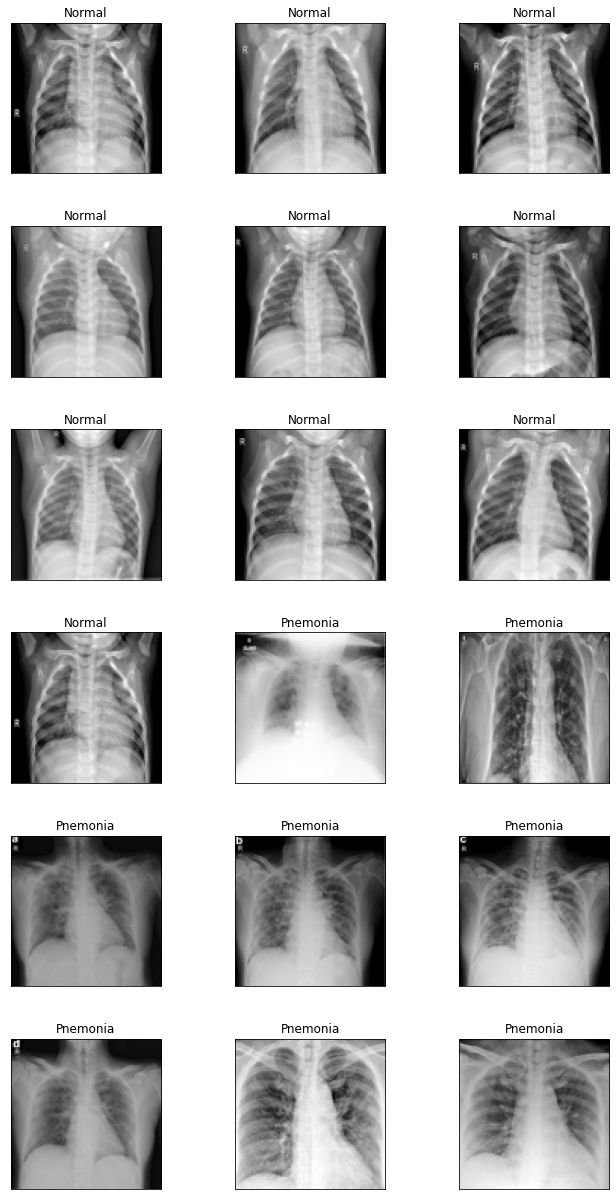

In [3]:
#plot images
def plot_gallery(images, titles, h, w, n_row=3, n_col=3):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(n_col * n_col, 6 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    #normal scans tended towards front
    for i in range(n_row * n_col):
        plt.subplot(n_row * 2, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    #pnemonia scans toward back so we pulled some from the back 
    #for demonstration purposes
    for j in range(n_row * n_col):
        plt.subplot(n_row * 2, n_col, n_row * n_col + j + 1)
        plt.imshow(images[-1*j], cmap=plt.cm.gray)
        plt.title(titles[-1*j], size=12)
        plt.xticks(())
        plt.yticks(())
        
plot_gallery(imagesToDisplay, labels, h, w)

## Data Reduction (6pts)

<ul>
    <li><b>[.5 points]</b> Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.</li>
    <li><b>[.5 points]</b> Perform linear dimensionality reduction of your image data using randomized principle components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.</li>
    <li><b>[2 points]</b>  Compare the representation using PCA and Randomized PCA. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components.  Do you prefer one method over another? Why?</li>
    <li><b>[1 points]</b> Perform feature extraction upon the images using any feature extraction technique (e.g., gabor filters, ordered gradients, DAISY, etc.).</li>
    <li><b>[2 points]</b> Does this feature extraction method show promise for your prediction task? Why? Use visualizations to analyze this questions. For example, visualize the differences between statistics of extracted features in each target class. Another option, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.</li>
</ul>

<ul>
    <li><b>[.5 points]</b> Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.</li>
</ul>

In [4]:
n_components = 300

In [5]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        

def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

In [6]:
X.copy()

[array([0, 0, 8, ..., 0, 0, 0], dtype=uint8),
 array([ 95, 104, 117, ...,   9,   0,   0], dtype=uint8),
 array([78, 68, 54, ...,  0,  0,  0], dtype=uint8),
 array([43, 51, 58, ..., 11, 11, 11], dtype=uint8),
 array([ 0,  5, 25, ...,  0,  0,  1], dtype=uint8),
 array([20, 30, 36, ...,  0,  0,  0], dtype=uint8),
 array([21, 17, 30, ..., 89, 90, 91], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([ 0, 10, 38, ...,  0,  0,  0], dtype=uint8),
 array([ 95, 108, 117, ...,   0,   0,   0], dtype=uint8),
 array([160, 173, 157, ...,   0,   0,   0], dtype=uint8),
 array([110, 153, 192, ...,   0,   0,   0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([105, 102,  97, ...,  68,  38,   5], dtype=uint8),
 array([ 92,  91, 116, ...,   0,   0,   0], dtype=uint8),
 array([ 85,  99, 101, ...,  59,  28,   3], dtype=uint8),
 array([ 74, 107, 147, ...,   0,   0,   0], dtype=ui

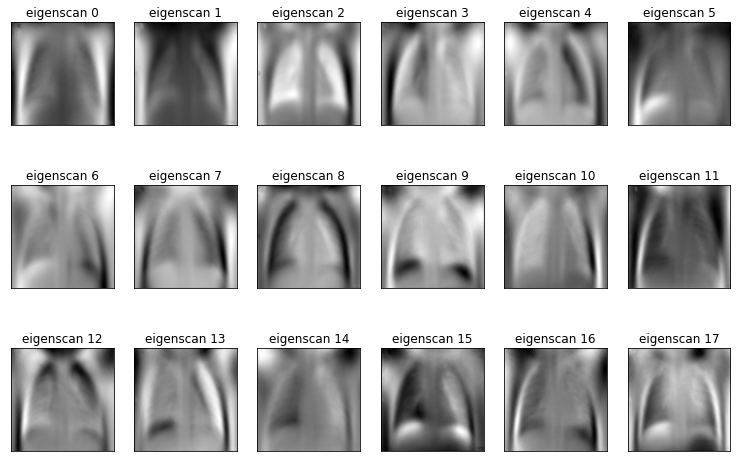

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=n_components)
pca.fit(X.copy())

eigenlungs = pca.components_
eigenlung_titles = ["eigenscan %d" % i for i in range(eigenlungs.shape[0])]

plot_gallery(eigenlungs, eigenlung_titles, 100, 100)
plot_explained_variance(pca)

Analyzing the explained variance graph for each component, we can see that to represent an image with 80% accuracy, it takes 28 components and 90% accuracy takes about 111 components. Using all 300 components yeilds almost 95% accuracy, but this is a drastically large number of components that are not all necessary. After about the 85% accuracy mark, we lose a majority of the number of useful components. Therefore, we can conclude that our image can be adequately represented with 80% accuracy because there are fewer of components required that still create a fairly accurate image.

In [8]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = 1    
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))

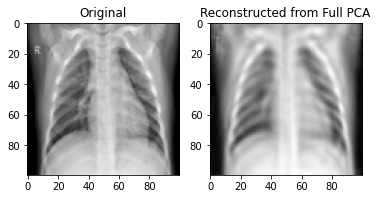

In [9]:
plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((100, 100)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((100,100)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid(False)

As we can see, Full PCA reconstructs our original image fairly accurate, allowing us to use it as a useful measurement of comparison.
<ul>
    <li><b>[.5 points]</b> Perform linear dimensionality reduction of your image data using randomized principle components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.</li>
</ul>

Wall time: 9.71 s


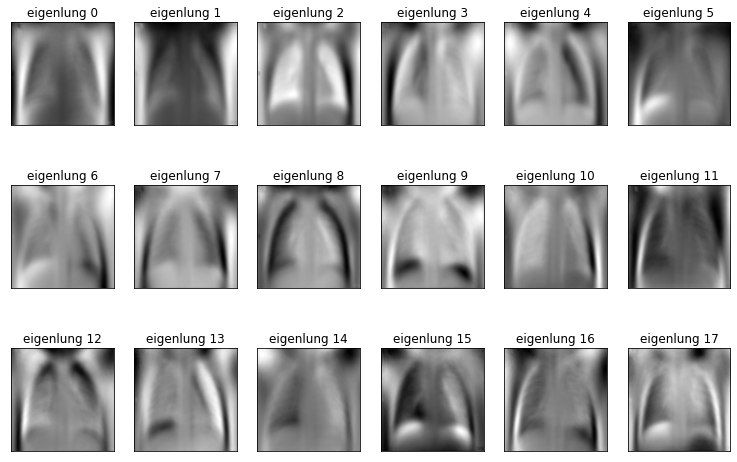

In [10]:
# lets do some PCA of the features and go from 1850 features to 300 features

rpca = PCA(n_components=n_components, svd_solver='randomized')
%time rpca.fit(X.copy())
eigenlungs = rpca.components_.reshape((n_components, h, w))
plot_explained_variance(rpca)

eigenlung_titles = ["eigenlung %d" % i for i in range(eigenlungs.shape[0])]
plot_gallery(eigenlungs, eigenlung_titles, h, w)

Analyzing the explained variance graph for each component, we can see that to represent an image with 80% accuracy, it takes 29 components and 90% accuracy takes about 112 components. Using all 300 components yeilds almost 95% accuracy again, but as before there are not many useful components after the 50 components mark. The results of the randomized PCA are almost exactly similar to full PCA.

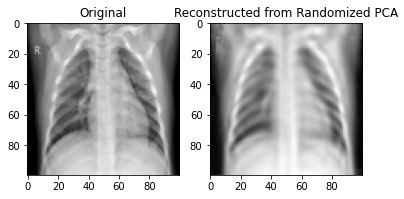

In [11]:
idx_to_reconstruct = 1    
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))

plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Randomized PCA')
plt.grid(False)

<ul>
    <li><b>[2 points]</b>  Compare the representation using PCA and Randomized PCA. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components.  Do you prefer one method over another? Why?</li>
</ul>

In [12]:
from ipywidgets import widgets  # make this interactive!

def plt_reconstruct(idx_to_reconstruct):
    # this code is for reference only, it does not qualify as a neaarest neighbor search
    #  for your lab project. 
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    x_flat = X[idx_to_reconstruct].reshape(1, -1)
    reconstructed_image = pca.inverse_transform(pca.transform(x_flat.copy()))    
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(x_flat.copy()))
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,3,1) # original
    plt.imshow(x_flat.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Original')
    plt.grid(False)
    
    plt.subplot(1,3,2) # pca
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid(False)
    
    plt.subplot(1,3,3) # randomized pca
    plt.imshow(reconstructed_image_rpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title('Randomized PCA')
    plt.grid(False)
    

widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,len(X)-1,1),__manual=True)

interactive(children=(IntSlider(value=2642, description='idx_to_reconstruct', max=5285), Output()), _dom_class…

<function __main__.plt_reconstruct(idx_to_reconstruct)>

Using the interactive slider, we can <b>qualitatively</b> analyze the full PCA and rPCA side by side next to each other and compare the visual differences with each other. This method is not very informative because it is difficult to pinpoint the exact differences with the naked eye. Let's try a <b>quantitative</b> measure such as comparing the run times of each representation.

In [13]:
import time
from IPython.display import display, HTML

pca_runtimes = []
rpca_runtimes = []

for i in range(1, 51):
    start = time.time()
    pca1 = PCA(n_components=n_components)
    pca1.fit(X.copy())
    end = time.time()
    pca_runtimes.append({'Full PCA': end - start})
    rstart = time.time()
    pca2 = PCA(n_components=n_components, svd_solver='randomized')
    pca2.fit(X.copy())
    rend = time.time()
    rpca_runtimes.append({'R PCA': rend - rstart})

fpca_df = pd.DataFrame(data=pca_runtimes)
rpca_df = pd.DataFrame(data=rpca_runtimes)

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

print('Avg runtime of of Full PCA: ', round(fpca_df['Full PCA'].mean(),5), 
      ' seconds\nAvg runtime of Randomized PCA: ',  round(rpca_df['R PCA'].mean(),5), 'seconds')

KeyboardInterrupt: 


From these samples, we can see how there is only a slight difference in average runtime between the two where Full PCA performs slightly faster. With more executions, I would expect a similar trend where Randomized PCA takes longer than Full PCA.

As the data set for running PCA gets larger, speed will be an issue, leading me to assume that Full PCA is more preferable because of the faster runtime, but we still need to understand which is better at representing images with fewer components. Lets try to find a more accurate quantitative measure to better support our argument, such as finding the mean squared error of reconstruction.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

X1data = X
X2data = X

MSE_Full_PCA = []
MSE_R_PCA = []

#determine mean squared error error in reconstruction using f_PCA and r_PCA for 1-50 components
for n in range(1,51):
    pca = PCA(n_components=n)
    recon = pca.inverse_transform(pca.fit_transform(X1data.copy()))
    mse = mean_squared_error(X1data[0], recon[0],squared=False)
    MSE_Full_PCA.append({'Full PCA MSE': mse})
    
for n in range(1,51):
    pca = PCA(n_components=n, svd_solver='randomized')
    recon = pca.inverse_transform(pca.fit_transform(X2data.copy()))
    mse = mean_squared_error(X2data[0], recon[0],squared=False)
    MSE_R_PCA.append({'Randomized PCA MSE': mse, 'Components': n})
    
fpca_df = pd.DataFrame(data=MSE_Full_PCA)
rpca_df = pd.DataFrame(data=MSE_R_PCA)

df = pd.concat([fpca_df, rpca_df], axis=1)
df

In [ ]:
df.plot(x="Components", y=["Randomized PCA MSE","Full PCA MSE"])
plt.ylabel('Mean Squared Error (%)', fontsize=12)
plt.show()

The table and graph visualize the mean squared error of reconstruction using Full PCA and Randomized PCA using 1-50 components. MSE is important to analyze because if there is a larger percentage of error during reconstruction, the image will not be represented accurately so it is best to use the measure that yields the lowest error. We can see how the MSE for each representation are very similar to each other and almost exactly alike. This means that both had similar percentage of error when reconstructing, and unfortunately, there is no definite trend as we increase the number of components.

Earlier, we said that 80% of the image can be accurately represented using 29 components, so using that reference and the chart above, there are ~19 full PCA MSE values that were lower than Randomized PCA MSE values. This means that to reconstruct an image (up to 80% accuracy), full PCA is better because it more generally yields a slightly lower mean squared error during reconstruction. Full PCA is also better at representing images with fewer components because it has lower MSE for just 10 components compared to 29, proving how it is more accurate than randomized PCA for a smaller number of components. Because of this and the faster runtime, we conclude full PCA is more accurate and efficient.

In [ ]:
from skimage.feature import daisy
from skimage.io import imshow

img = X[1].reshape(h,w)
features, img_desc = daisy(img, 
                           step=20, 
                           radius=20, 
                           rings=2, 
                           histograms=8, 
                           orientations=8, 
                           visualize=True)
imshow(img_desc)
plt.grid(False)

print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])


In [ ]:
# create a function to take in the row of the matrix and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape), step=20, radius=20, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    # reshape with -1 turns it into a vector
    return feat.reshape((-1))

# Test it with just one image
%time test_feature = apply_daisy(X[0],(h,w))
test_feature.shape

In [ ]:
# takes about a 40s to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, X, (h,w))
print(daisy_features.shape)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

In [ ]:
import copy
example_index = 827

# Visual example of finding the closest image by comparing feature distances
distances = copy.deepcopy(dist_matrix[example_index,:])
distances[idx1] = np.infty 
closest_index = np.argmin(distances)

plt.figure(figsize=(8,10))
plt.subplot(1,2,1)
imshow(X[example_index].reshape((h,w)))
plt.title("Original Image")
plt.grid()

plt.subplot(1,2,2)
imshow(X[closest_index].reshape((h,w)))
plt.title("Closest Image")
plt.grid()

print('Original image lung condition:', summary.iloc[idx1]['Label'])
print('Closest image lung condition:', summary.iloc[idx2]['Label'])

correct = 0
false_pos = 0
false_neg = 0
for i in range(len(distances)):
    distances = copy.deepcopy(dist_matrix[i,:])
    distances[i] = np.infty
    i2 = np.argmin(distances)
    orig = summary.iloc[i]['Label']
    closest = summary.iloc[i2]['Label']
    if orig == closest:
        correct += 1
    else:
        if orig == 'Pnemonia':
            false_neg += 1
        elif orig == 'Normal':
            false_pos += 1

total = len(distances)
accuracy = round((correct/total) * 100, 2)
wrong = total - correct
print(correct, '/', total)
print('Accuracy:', accuracy)
print('Of the',wrong,'images it predicted incorrectly,',false_pos,
      'were false positives and',false_neg,'were false negatives')

The DAISY feature extraction method looks promising for predicting Pnemonia. It correctly picked an image of lungs with the same lung conditions as the original image 93.31% of the time. This is only 0.2% better than the average  diagnosis accuracy by radiologists, but we believe with optimizations the algorithm could improve by 2-3%. With a accuracy so similar to the best human identifiers, it would be interesting to see what percentage of the misdiagnosed cases are also misdiagnosed by humans. If the misdiagnosed cases by the algorithm are easily identifiable by radiologists, then the algorithm will be quite useful when used __in conjuction__ with radiologists, because the combined diagnosis will result in a more accurate prediction.

## Exceptional Work (1pt)

<ul>
    <li>One idea (<b>required for 7000 level students</b>): Perform feature extraction upon the images using DAISY. Rather than using matching go the images with the total DAISY vector, you will instead use key point matching. You will need to investigate appropriate methods for key point matching using DAISY. NOTE: this often requires some type of brute force matching per pair of images, which can be computationally expensive.</li>
</ul>

In [14]:
%%time

# for the exceptional credit, you might be interested in the following code
# you will need to repeat this for all pairs of images in the testing and training 
from skimage.feature import match_descriptors
from skimage.feature import daisy

def apply_daisy(row,shape): # no reshape in this function
    feat = daisy(row.reshape(shape), step=5, radius=5, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    s = feat.shape # PxQxR
    #P = ceil((Height - radius*2) / step) 
    #Q = ceil((Width - radius*2) / step) 
    #R = (rings * histograms + 1) * orientations
    return feat.reshape((s[0]*s[1],s[2]))

daisy_features = np.apply_along_axis(apply_daisy, 1, X, (h,w))

Wall time: 38.3 s


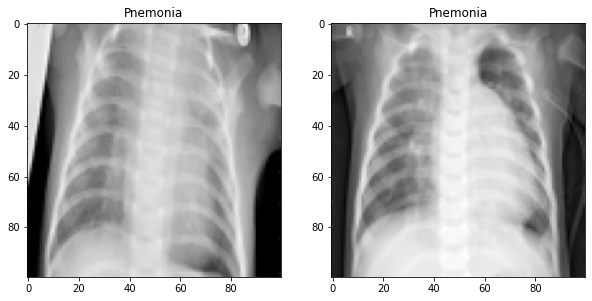

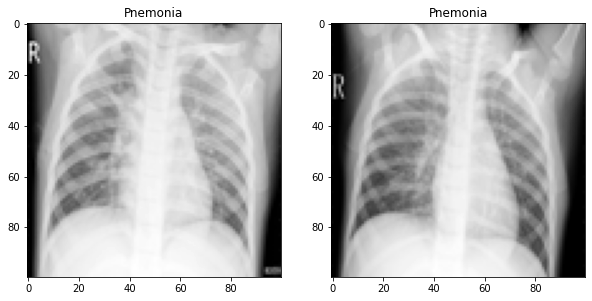

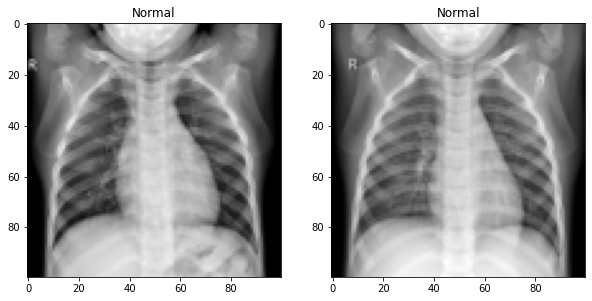

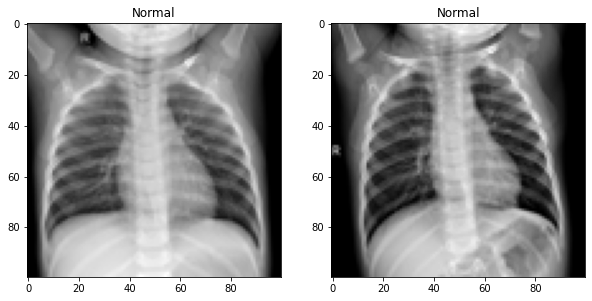

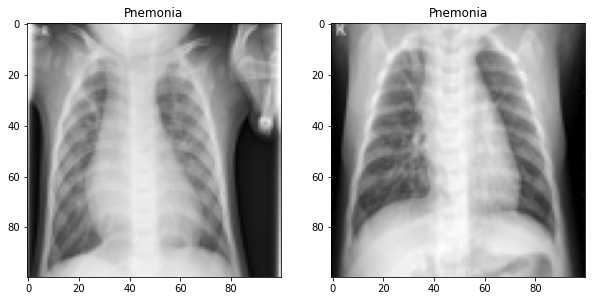

In [66]:
from matplotlib.pyplot import imshow

def find_matches(idx):
    match_percentages = []
    for i in range(len(daisy_features)):
        if i == idx:
            match_percentages.append(0)
        else:
            matches = match_descriptors(daisy_features[idx], daisy_features[i],
                                        cross_check=True, max_ratio=0.8)
            result = matches.shape[0]/len(daisy_features[idx])
            match_percentages.append(result)
            
    return match_percentages
            
    
sample_size = 5
for i in range(sample_size):
    x = np.random.randint(len(X))
    plt.figure(figsize=(10,50))
    
    best_match = np.argmax(find_matches(x))

    plt.subplot(sample_size,2,2*i + 1)
    plt.imshow(X[x].reshape(h,w), cmap=plt.cm.gray)
    plt.title(image_data.Label[x])
    plt.grid(False)

    plt.subplot(sample_size,2,2*i + 2)
    plt.imshow(X[best_match].reshape(h,w), cmap=plt.cm.gray)
    plt.title(image_data.Label[best_match])
    plt.grid(False)
    
    

Though small in size, this sample shows that combining DAISY with key point matching can be a very effective way to determine whether two images are similar. While this is demonstrated in a rather simple way here by showing only the best match, there is a very real opportunity to perform a more numerical analysis on *all* of the matches rather than just the best one.

One of the flaws in this methodology (which may or may not exist to different degrees in other methods) is that on some of the images, there are certain elements that a human would know to be irrelevant that the image processing algorithm may value too heavily, such as the letters that appear on the side of many of the image pairs. In many cases, there will be a similar letter in a similar location in the best match for the image, which is technically what the algorith is built to do, but also is irrelevant in our use case, and is therefore worthy of being pointed out.